# Airline Analysis

In this project, you’ll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels

In [2]:
flight = pd.read_csv('flights.csv')
flight.head(2)

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6


- miles: miles traveled through the flight
- passengers: number of passengers on the flight
- delay: take-off delay in minutes
- inflight_meal: is there a meal included in the flight?
- inflight_entertainment: are there free entertainment systems for each seat?
- inflight_wifi: is there complimentary wifi on the flight?
- day_of_week: day of the week of the flight
- weekend: did this flight take place on a weekend
- coach_price: the average price paid for a coach ticket
- firstclass_price: the average price paid for first-class seats
- hours: how many hours the flight took
- redeye: was this flight a redeye (overnight)?

In [3]:
flight.describe(include='all')

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
count,129780.000000,129780.000000,129780.000000,129780,129780,129780,129780,129780,129780,129780.000000,129780.000000,129780.000000
unique,NaN,NaN,NaN,2,2,2,7,2,2,NaN,NaN,NaN
top,NaN,NaN,NaN,No,Yes,Yes,Saturday,No,Yes,NaN,NaN,NaN
freq,NaN,NaN,NaN,90813,104028,116766,33736,123334,84643,NaN,NaN,NaN
mean,2006.224696,207.723155,13.162845,NaN,NaN,NaN,NaN,NaN,NaN,376.585253,1454.931785,3.631214
std,943.034768,12.776363,41.941680,NaN,NaN,NaN,NaN,NaN,NaN,67.744274,162.590434,1.739118
min,12.000000,135.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,44.415000,939.100000,1.000000
25%,1343.000000,204.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,331.445000,1302.200000,2.000000
50%,1986.000000,210.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,380.560000,1503.840000,4.000000
75%,2468.000000,215.000000,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,426.676250,1582.370000,4.000000


## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered average? Does $500 seem like a good price for a coach ticket?

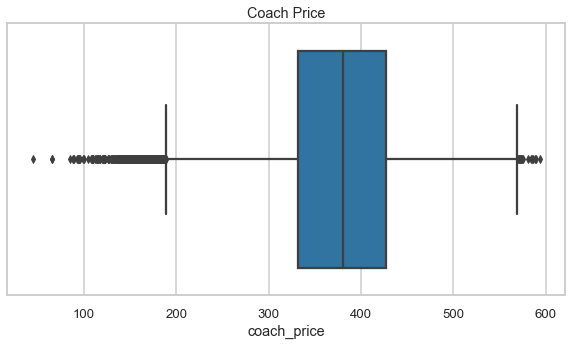

In [4]:
# One quantitative variable

sns.color_palette('Pastel1')
sns.set_style('whitegrid')
sns.set_context('talk', font_scale=0.8)

plt.figure(figsize=(10,5))
sns.boxplot(data=flight, x='coach_price')
plt.title('Coach Price')
plt.savefig('coach_ticket-boxplot.png')

In [5]:
# the highest price for coach ticket approximetly $600 ($593) and the lowest price under $100 ($44).
# For this class the avearge price is between $300 and $400 ($376).
# The most coach ticket prices fall within $300 and $400, $500 is consider pricey for economy class (is it far away 
#   from median (in the tail of the histogram or box plot)).

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 ticket seem more reasonable than before?

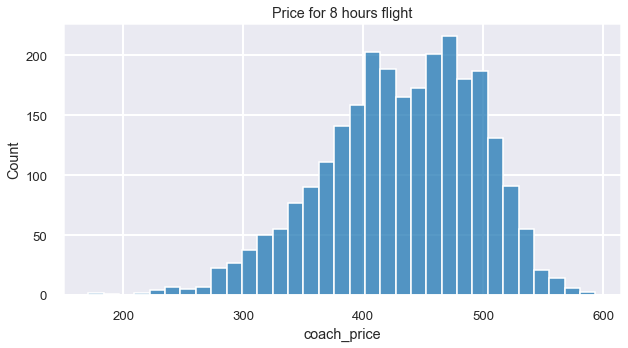

In [6]:
# two quantitative variable

sns.color_palette('Pastel2')
sns.set_style('darkgrid')
sns.set_context('poster', font_scale=0.6)

plt.figure(figsize=(10, 5))
sns.histplot(flight.coach_price[flight['hours'] >= 8])
plt.title('Price for 8 hours flight')
plt.savefig('histplot_price_8hrs.png')

In [7]:
print('The lowers price for 8 hours long flights $', (np.min(flight.coach_price[flight['hours'] >= 8])))

The lowers price for 8 hours long flights $ 170.77


In [8]:
print('The highest price for 8 hours long flights $', (np.max(flight.coach_price[flight['hours'] >= 8])))

The highest price for 8 hours long flights $ 593.635


In [9]:
print('The average price for 8 hours long flights $', (np.mean(flight.coach_price[flight['hours'] >= 8])))

The average price for 8 hours long flights $ 431.8343773728164


In [10]:
# $500 price is in the middle of summary statistic, it is reasonable price for 8 hour long flights. 

3. How are flight delay times distributed? Let’s say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

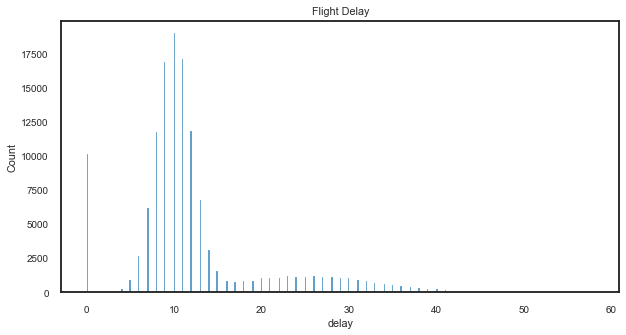

In [11]:
sns.color_palette('Dark2')
sns.set_style('white')
sns.set_context('talk', font_scale=0.6)

plt.figure(figsize=(10, 5))
sns.histplot(flight.delay[flight.delay <= 600]) # 600 mins
plt.title('Flight Delay')
plt.savefig('delay.png')

In [12]:
# 10 mins delay is commonly fair for this flight.

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

<Figure size 720x360 with 0 Axes>

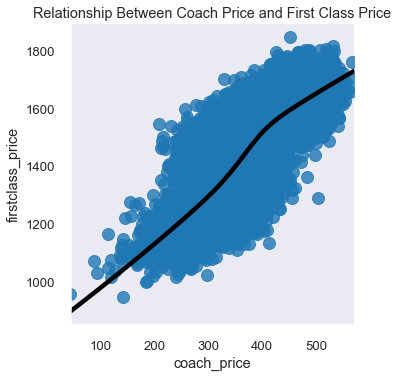

In [13]:
perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

sns.color_palette('Set1')
sns.set_style('dark')
sns.set_context('poster', font_scale=0.6)

plt.figure(figsize=(10, 5))
sns.lmplot(data=flight_sub, x='coach_price', y='firstclass_price', line_kws={'color': 'black'},
               lowess=True)
plt.title('Relationship Between Coach Price and First Class Price')

plt.savefig('coach_first_price.png')

In [14]:
# Higher coach price always have higher first-class price as well.

5. What is the relationship between coach prices and inflight features— inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

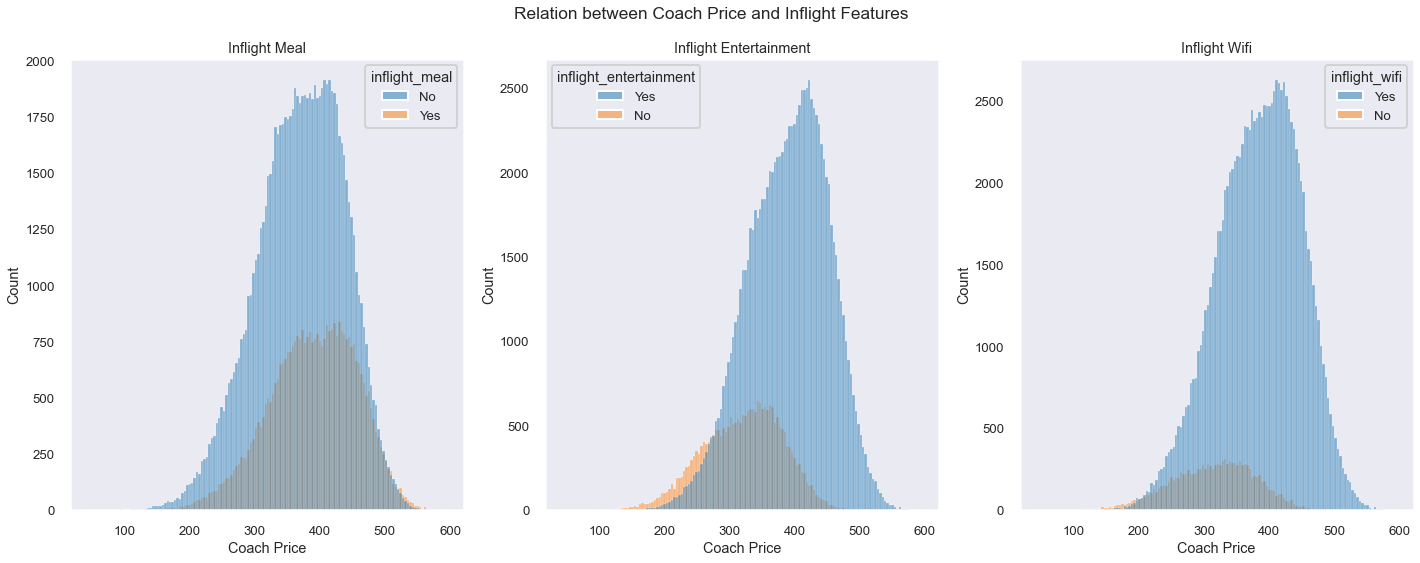

In [15]:
# histogram

plt.figure(figsize=(20,8))

# inflight meal
ax1 = plt.subplot(1,3,1) # 1 line, 3 rows, index nr 1 (first position in the subplot)
ax1 = sns.histplot(data=flight, x='coach_price', hue='inflight_meal')
ax1.set(title='Inflight Meal', xlabel='Coach Price', ylabel='Count')

# inflight entertainment
ax1 = plt.subplot(1,3,2) # 1 line, 3 rows, index nr 1 (first position in the subplot)
ax1 = sns.histplot(data=flight, x='coach_price', hue='inflight_entertainment')
ax1.set(title='Inflight Entertainment', xlabel='Coach Price', ylabel='Count')

# inflight wifi
ax1 = plt.subplot(1,3,3) # 1 line, 3 rows, index nr 1 (first position in the subplot)
ax1 = sns.histplot(data=flight, x='coach_price', hue='inflight_wifi')
ax1.set(title='Inflight Wifi', xlabel='Coach Price', ylabel='Count')

plt.suptitle('Relation between Coach Price and Inflight Features')
plt.subplots_adjust(wspace=0.8, bottom=0.2)
plt.tight_layout()

plt.savefig('inflight_feature.png')

Inflight meal is associated with highest increase in price.

6. How does the number of passengers change in relation to the length of flights?

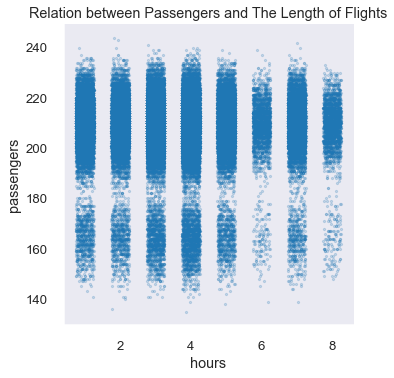

In [16]:
# scatter plot passangers and hours

sns.lmplot(data=flight, y='passengers', x='hours', x_jitter=0.25, scatter_kws={'s':5, 'alpha':0.2}, fit_reg=False)
plt.title('Relation between Passengers and The Length of Flights')

plt.savefig('passenger_hours.png')

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

In [17]:
flight['day_of_week'].value_counts()

Saturday     33736
Sunday       28298
Friday       22609
Monday       14065
Tuesday      11391
Wednesday    11221
Thursday      8460
Name: day_of_week, dtype: int64

Text(0.5, 1.0, 'Price coach and firstclas on weekends')

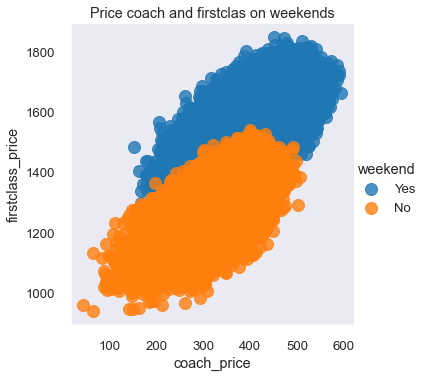

In [18]:
sns.lmplot(data=flight, x='coach_price', y='firstclass_price', hue='weekend', fit_reg=False)
plt.title('Price coach and firstclas on weekends')

(We can see that on average, weekend tickets are more expensive than weekday tickets. However, based on this plot it seems like it’s easier to get a good deal on a first-class ticket on a weekday than on a weekend: the price difference between first-class and coach level tickets is larger on the weekend than on a weekday.)

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

Text(0.5, 1.0, 'Distribution Coach Price for week based flight on redeye (Overnight)')

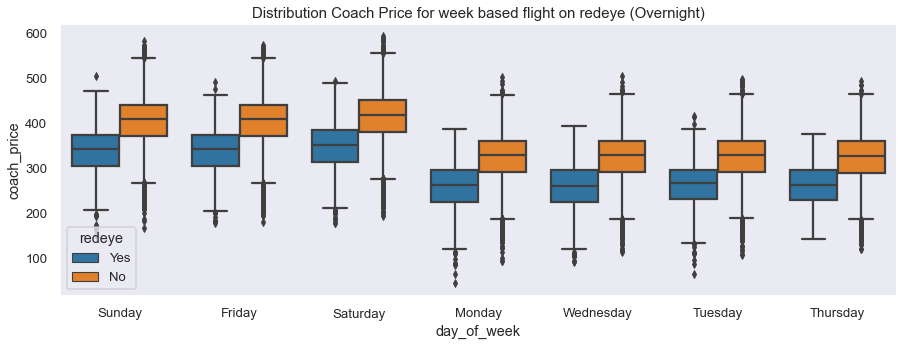

In [19]:
sns.set_context('talk', font_scale=0.8)
plt.figure(figsize=(15,5))
sns.boxplot(data=flight, x='day_of_week', y='coach_price', hue='redeye')
plt.title('Distribution Coach Price for week based flight on redeye (Overnight)', fontsize=15)

(We can see more clearly that the difference between redeyes and non-redeyes is pretty much the same on any day of the week, though on average weekend flights cost more than weekday flights.)